In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam

In [9]:
def readCSV(path):
  # reading dataset
  dataset = pd.read_csv(path)
  # priting the struct of dataset
  print(dataset.head(5))

  # vizualizing the data points
  plt.plot(dataset.date, (dataset.Tmax+dataset.Tmin)/2)
  plt.show()

  return (dataset.Tmax+dataset.Tmin)/2

           date  Tmax  Tmin  Unnamed: 3
0  '2019-09-01'  32.3  24.8         NaN
1  '2019-09-02'  32.6  22.2         NaN
2  '2019-09-03'  21.9  16.1         NaN
3  '2019-09-04'  25.6  15.9         NaN
4  '2019-09-05'  26.5  18.6         NaN


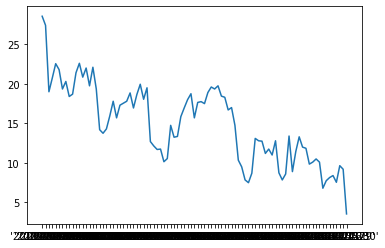

In [10]:
X2 = readCSV('2019_learn_data.csv')

           date  Tmax  Tmin  Unnamed: 3
0  '2020-09-01'  19.7  15.7         NaN
1  '2020-09-02'  24.0  13.9         NaN
2  '2020-09-03'  25.1  17.1         NaN
3  '2020-09-04'  25.9  16.7         NaN
4  '2020-09-05'  28.9  19.7         NaN


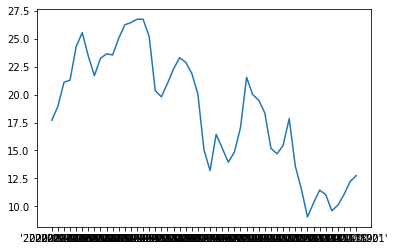

In [11]:
X = readCSV('2020_tuning_data.csv')
# data starts at 2020.09.01 ends at 2020.10.20

In [12]:
window_size = 20
ts = np.array([X[start:start+window_size] for start in range(0,X.shape[0]-window_size)])
X.shape
#ts.shape

(51,)

In [13]:
ts = np.atleast_3d(ts)
ts.shape

(31, 20, 1)

In [14]:
ts_target = X[window_size:]

In [15]:
# going to use the same model as we learnt on the class ,just simpliyfing it because i have a fewer datapoints
model = Sequential()
model.add(Conv1D(32,4,activation='relu',input_shape=(window_size,1)))
model.add(MaxPooling1D())
#model.add(Conv1D(8,3,activation='relu'))
#model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1,activation='linear'))

In [16]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 17, 32)            160       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [18]:
v_split = 0.2
t_split = 0.1
nb_samples = ts.shape[0]
valid_size = int(nb_samples*(1-t_split-v_split))
test_size = int(nb_samples*(1-t_split))
X_train, Y_train = ts[:valid_size],   ts_target[:valid_size]
X_valid, Y_valid = ts[valid_size:test_size], ts_target[valid_size:test_size]
X_test , Y_test  = ts[test_size:], ts_target[test_size:]

In [19]:
model.fit(X_train,Y_train,epochs=100,steps_per_epoch=32,validation_data=(X_valid,Y_valid))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 178.5279 - mae: 12.1772 - val_loss: 1.8163 - val_mae: 1.1648
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 14.1226 - mae: 3.0973 - val_loss: 17.7985 - val_mae: 4.0956
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 10.9820 - mae: 2.9120 - val_loss: 10.1578 - val_mae: 3.0192
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 10.7097 - mae: 2.7945 - val_loss: 10.8395 - val_mae: 3.1266
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 10.4404 - mae: 2.8208 - val_loss: 9.3140 - val_mae: 2.8571
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 9.9459 - mae: 2.7507 - val_loss: 14.6210 - val_mae: 3.6567
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 9.7110 - mae: 2.6573 - val_loss: 9.2925 - val_mae: 2.8456
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss:

In [20]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 1.0246 - mae: 0.7332


[1.0246198177337646, 0.7331538200378418]

In [65]:
preds = model.predict(X_test)
print(X_test)

[[[16.45]
  [15.2 ]
  [13.95]
  [14.85]
  [17.05]
  [21.55]
  [20.  ]
  [19.5 ]
  [18.35]
  [15.2 ]
  [14.7 ]
  [15.45]
  [17.85]
  [13.6 ]
  [11.55]
  [ 9.05]
  [10.3 ]
  [11.45]
  [11.05]
  [ 9.6 ]]

 [[15.2 ]
  [13.95]
  [14.85]
  [17.05]
  [21.55]
  [20.  ]
  [19.5 ]
  [18.35]
  [15.2 ]
  [14.7 ]
  [15.45]
  [17.85]
  [13.6 ]
  [11.55]
  [ 9.05]
  [10.3 ]
  [11.45]
  [11.05]
  [ 9.6 ]
  [10.1 ]]

 [[13.95]
  [14.85]
  [17.05]
  [21.55]
  [20.  ]
  [19.5 ]
  [18.35]
  [15.2 ]
  [14.7 ]
  [15.45]
  [17.85]
  [13.6 ]
  [11.55]
  [ 9.05]
  [10.3 ]
  [11.45]
  [11.05]
  [ 9.6 ]
  [10.1 ]
  [11.05]]

 [[14.85]
  [17.05]
  [21.55]
  [20.  ]
  [19.5 ]
  [18.35]
  [15.2 ]
  [14.7 ]
  [15.45]
  [17.85]
  [13.6 ]
  [11.55]
  [ 9.05]
  [10.3 ]
  [11.45]
  [11.05]
  [ 9.6 ]
  [10.1 ]
  [11.05]
  [12.2 ]]]


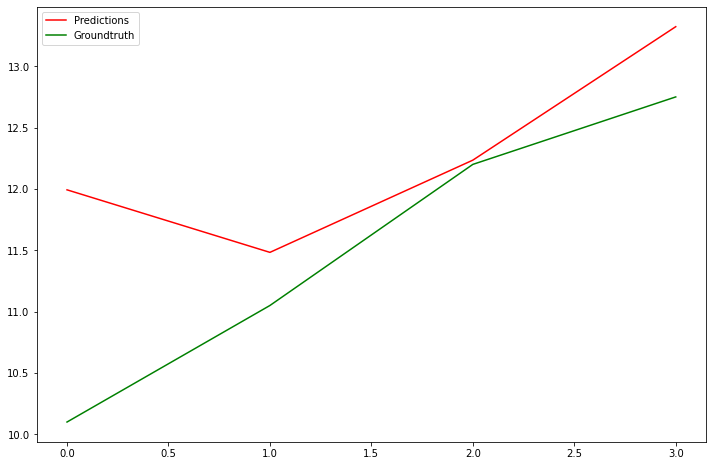

In [22]:
plt.figure(figsize=(12,8))
plt.plot(preds, color='r', label='Predictions')
plt.plot(Y_test.to_list(), color='g', label='Groundtruth')
plt.legend()

Predict for 2020.10.28
            2020.11.03
            2020.11.24

In [99]:
# sample 50 is 2020.10.20 so 
# 2020.10.28 is gona be sample 58 at position 8 is 10.28
# 2020.11.03 is gona be sample 64 at position 14 is 11.03
# 2020.11.24 is gona be sample 85 at position 35 is 11.24
future_average_temperature = []

In [100]:
futuregenerator = X_test.copy()
# deleting the 0 axis of the array so i can make a new 20 window sized block with the future data
for i in range(0,85-50):#85-50):
  # making prediction 
  _pred = model.predict(futuregenerator)
  
  # i have to update the predicter array
  futuregenerator = np.delete(futuregenerator,0,axis=0)
  # copying the last element of the array
  _tempgen = futuregenerator[-1].copy()
  # deleting the first element
  _tempgen = np.delete(_tempgen,0)
  # adding the prected value, -1 for last element because 4 was given back
  _tempgen = np.insert(_tempgen,len(_tempgen),_pred[-1])

  # appending the last element for saveout
  future_average_temperature.append(_pred[-1])

  #reshaping the temperary 3d array for concatenateing
  _tempgen = _tempgen.reshape(1,20,-1)
  
  # concaneting with the future value which we can't make sure that is correct
  futuregenerator = np.concatenate((futuregenerator,_tempgen))

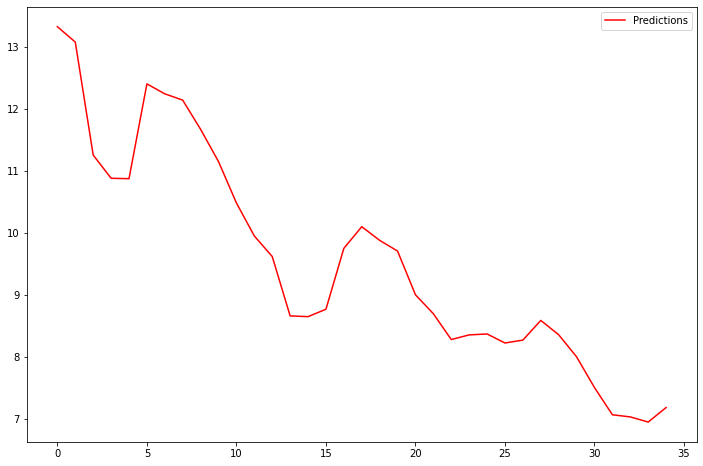

In [101]:
plt.figure(figsize=(12,8))
plt.plot(future_average_temperature, color='r', label='Predictions')
plt.legend()

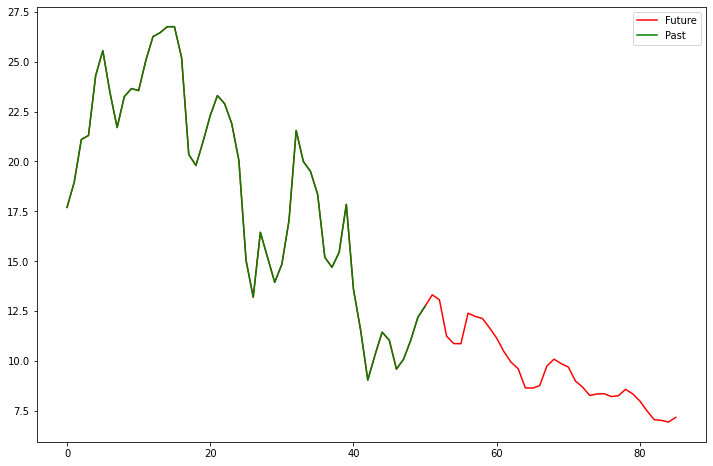

In [112]:
plt.figure(figsize=(12,8))
plt.plot(X.to_list()+future_average_temperature, color='r', label='Future')
plt.plot(X.to_list(), color='g', label='Past')
plt.legend()

# sample 50 is 2020.10.20 so 
# 2020.10.28 is gona be sample 58 at position 8 is 10.28
# 2020.11.03 is gona be sample 64 at position 14 is 11.03
# 2020.11.24 is gona be sample 85 at position 35 is 11.24

In [114]:
print("The average tempature gona be the following:")
print("In 2020.10.28: " + str(future_average_temperature[8-1]) + "celsius")
print("In 2020.11.03: " + str(future_average_temperature[14-1]) + "celsius")
print("In 2020.11.24: " + str(future_average_temperature[35-1]) + "celsius")

The average tempature gona be the following:
In 2020.10.28: [12.138337]celsius
In 2020.11.03: [8.660609]celsius
In 2020.11.24: [7.1837435]celsius
